<a href="https://colab.research.google.com/github/git-bauerseb/deep-learning/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf

import cProfile

tf.executing_eagerly()

In [ ]:
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(mnist_images[..., tf.newaxis]/255, tf.float32),
     tf.cast(mnist_labels, tf.int64)
     ))

dataset = dataset.shuffle(1000).batch(32)

In [ ]:
mnist_model = tf.keras.Sequential([
                                   tf.keras.layers.Conv2D(16, [3,3], activation='relu',
                                                          input_shape=(None, None, 1)),
                                   tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
                                   tf.keras.layers.GlobalAveragePooling2D(),
                                   tf.keras.layers.Dense(10)
])

In [ ]:
mnist_model.summary()

# Logit: Values used as input to softmax


for images, labels in dataset.take(1):
  print("Logits: ", mnist_model(images[0:1]).numpy())

In [ ]:
# Keras models have builtin training loop ('fit' method)
# More customization

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

def train_step(images, labels):
  # Use to inspect computes gradients
  with tf.GradientTape() as tape:
      logits = mnist_model(images, training=True)

      tf.debugging.assert_equal(logits.shape, (32,10))

      loss_value = loss_object(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  grads = tape.gradient(loss_value, mnist_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))


def train(epochs):
  for epoch in range(epochs):
    for (batch, (images, labels)) in enumerate(dataset):
      train_step(images, labels)

    print('Epoch {} finished'.format(epoch))

train(epochs=3)

In [ ]:
import matplotlib.pyplot as plt


plt.plot(loss_history)
plt.xlabel("Batch #")
plt.ylabel("Loss [Entropy]")

In [ ]:
# Short

x = tf.ones((2,2))

with tf.GradientTape(persistent=True) as t:
  t.watch(x)

  y = tf.reduce_sum(x)
  z = tf.multiply(y,y)


dz_dx = t.gradient(z,x)
dz_dy = t.gradient(z,y)
print(dz_dy)
print(dz_dx)


del t

In [ ]:
####################
# START HERE
import os
import tensorflow as tf
import cProfile

tf.executing_eagerly()

x = [[2.]]
m = tf.matmul(x,x)
print(m)

In [ ]:
x = [[2., 3.]]
y = [[1.], [4.]]

a = tf.constant([[1,2], [3,4]])

print(tf.matmul(x,y))
print(a)

b = tf.add(a,1)
print(b)

c = a + 1
print(c)

# Overloading
print(a*b)

# Obtain numpy value from tensor
print(a.numpy())

def fizzbuzz(max_num):
  counter = tf.constant(0)
  max_num = tf.convert_to_tensor(max_num)

  for num in range(1, max_num.numpy() + 1):
    num = tf.constant(num)
    if int(num % 3) == 0 and int (num % 5) == 0:
      print('FizzBuzz')
    elif int(num % 3) == 0:
      print('Fizz')
    elif int(num % 5) == 0:
      print('Buzz')
    else:
      print(num.numpy())
    counter += 1

fizzbuzz(15)

In [ ]:
w = tf.Variable([[1.]])
print(w)

with tf.GradientTape() as tape:
  loss = w*w

grad = tape.gradient(loss, w)
print(grad)

In [ ]:
# Train model
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    
  (tf.cast(mnist_images[...,tf.newaxis] / 255, tf.float32),
   tf.cast(mnist_labels, tf.int64)
   ))

dataset = dataset.shuffle(1000).batch(32)



In [ ]:
mnist_model = tf.keras.Sequential([
                                   
  tf.keras.layers.Conv2D(16, [3,3], activation='relu', input_shape=(None, None,1)),
  tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

for images,labels in dataset.take(1):
  print(mnist_model(images[0:1]).numpy())

In [ ]:
#################################
# Diven into Deep Learning
#################################

!pip install d2l

In [ ]:
#################################
# Diven into Deep Learning
#################################


######
# Ch 2
######

# 2.1

x = tf.range(12)
x

print(x.shape)
print(tf.size(x))

# -1 --> Automatically calculates dimnension
x = tf.reshape(x, (3,-1))
print(x)

print(tf.zeros((2,3,4)))
print(tf.ones((2,3,4)))


# Each element is randomly sampled from standard Gaussian (mean 0; stddev 1)
print(tf.random.normal(shape=[3,4]))


# Elementwise operations
x = tf.constant([1.0, 2, 4, 8])
y = tf.constant([2.0, 2, 2, 2])

print(x+y)
print(x-y)
print(x*y)
print(x/y)
print(x**y)

In [ ]:
# Concat tensors

X = tf.reshape(tf.range(12, dtype=tf.float32), (3,4))
Y = tf.constant([[2,1,4,3], [1,2,3,4], [4,3,2,1]], dtype=tf.float32)

C1 = tf.concat([X,Y], axis=0)
print(X)
print(Y)
print(C1)

# Logical elementwise operation
print(X == Y)

# Sum all elements up
print(tf.reduce_sum(X))

In [ ]:
# Apply elementwise operation on tensors of different size
a = tf.reshape(tf.range(3), (3,1))
b = tf.reshape(tf.range(2), (1,2))

print(a)
print(b)
print(a+b)

In [ ]:
# Indexing

# Tensors are immutable -> Create separate variable
X = tf.random.normal(shape=(4,4))
X_var = tf.Variable(X)
X_var[::2, :].assign(tf.zeros(X_var[::2,:].shape, dtype=tf.float32))
print(X_var)

In [ ]:
X = tf.reshape(tf.range(12, dtype=tf.float32), (3,4))
Y = tf.constant([[2,1,4,3], [1,2,3,4], [4,3,2,1]], dtype=tf.float32)

before = id(Y)
Y = Y + X
id(Y) == before

Z = tf.Variable(tf.zeros_like(Y))
print('id(Z):', id(Z))
print('id(Z):', id(Z))

# tf.function decorator to wrap computation inside of TensorFlow graph
@tf.function
def computation(X,Y):
  Z = tf.zeros_like(Y)
  A = X + Y     # Allocations will be reused
  B = A + Y
  C = B + Y
  return C + Y

computation(X,Y)

In [ ]:
A = X.numpy()
B = tf.constant(A)
print(type(A))
print(type(B))

In [ ]:
# 2.2 - Data Preprocessing

import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')

with open(data_file, 'w') as f:
  f.write('NumRooms, Alley, Price\n')
  f.write('NA, Pave, 127500\n')
  f.write('2, NA, 106000\n')
  f.write('4, NA, 178100\n')
  f.write('NA, NA, 140000\n')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

In [ ]:
import numpy as np

inputs, outputs = data.iloc[:, 0:2], data.iloc[:,2]

notNAValMatrix = np.array(inputs.notna())


max = np.max(np.sum(notNAValMatrix + 0, axis=1))

filtered = inputs.dropna(thresh=max)

print(filtered)

# Fill missing inputs by average of available data points
inputs = inputs.fillna(inputs.mean())
print(inputs)

inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

# All values are numeric --> can be converted to tensors

X, y = tf.constant(inputs.values), tf.constant(outputs)
X,y

In [ ]:
# 2.3 Linear Algebra
import tensorflow as tf

## Scalars
x = tf.constant(3.0)
print(x)

## Matrices

A = tf.reshape(tf.range(20), (5,4))
print(A)

print(tf.transpose(A))

### Symmetric matrix
B = tf.constant([[1,2,3],[2,0,4], [3,4,5]])
print(B == tf.transpose(B))


## Tensors
X = tf.reshape(tf.range(24), (2,3,4))
print(X)

In [ ]:
print(tf.transpose(X))


### Hadamard product
A = tf.reshape(tf.range(20, dtype=tf.float32), (5,4))
B = A

A * B

### Multiply by scalar
a = 2
print(X.shape)
print((a*X).shape)

### Reductions

#### Sum
A = tf.reshape(tf.range(20), (5,4))
print(A,tf.reduce_sum(A, axis=0))

# Keep axes after reduction
A = tf.reshape(tf.range(20), (5,4))
sum_A = tf.reduce_sum(A, axis=1, keepdims=True)
print(A / sum_A)
print(tf.reduce_sum(A / sum_A))

#### Mean
N = tf.random.normal(shape=(700,700))
print(tf.reduce_mean(N))

#### Cumulative sum
print(tf.cumsum(A, axis=0))

In [ ]:
### Dot product
y = tf.ones(4, dtype=tf.float32)
print(tf.tensordot(x,y,axes=1))

A = tf.reshape(tf.range(20), (5,4))
B = tf.reshape(tf.range(20), (4,5))

print(A)
print(B)
print(tf.tensordot(A,B, axes=0))

In [ ]:
### Norms

#### L2 norm by standard
u = tf.constant([3.0, -4.0])
print(tf.norm(u))

#### L1 norm
print(tf.reduce_sum(tf.abs(u)))

#### Frobenius norm (matrix)


In [ ]:
## 2.4 Calculus
!pip install d2l
%matplotlib inline

import numpy as np
from IPython import display
from d2l import tensorflow as d2l

def f(x):
  return 3 * x ** 2 - 4 * x

def numerical_lim(f,x,h):
  return (f(x+h) - f(x)) / h

h = 0.1
for i in range(5):
  print(numerical_lim(f,1,h))
  h *= 0.1

In [ ]:
from IPython import display
import numpy as np
from d2l import tensorflow as d2l

# Specifices to use svg figures
def use_svg_display():
  display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

# For plotting mutliple curves
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear',
        yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
  if legend is None:
    legend = []

  set_figsize(figsize)
  axes = axes if axes else d2l.plt.gca()

  def has_one_axis(X):
      return (hasattr(X, 'ndim') and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], '__len__'))

  if has_one_axis(X):
    X = [X]
  if Y is None:
      X, Y = [[]] * len(X), X
  elif has_one_axis(Y):
    Y = [Y]
  if len(X) != len(Y):
    X = X * len(Y)
  axes.cla()

  for x,y, fmt in zip(X,Y,fmts):
    if len(x):
      axes.plot(x,y,fmt)
    else:
      axes.plot(y,fmt)
  set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)



x = np.arange(0,3,0.1)

def f(x):
  return 3 * x ** 2 - 4 * x 

plot(x, [f(x), 2*x-3], 'x', 'f(x)', legend=['f(x)', 'Tagent line'])

In [ ]:
## 2.5 Automatic Differentiation

import tensorflow as tf

x = tf.range(4, dtype=tf.float32)
print(x)

x = tf.Variable(x)

with tf.GradientTape() as t:
  y = 2 * tf.tensordot(x,x, axes=1)

x_grad = t.gradient(y,x)
x_grad

### Backward for Non-Scalar Variables

with tf.GradientTape() as t:
  y = x * x

t.gradient(y,x)

In [ ]:
with tf.GradientTape(persistent=True) as t:
  y = x * x
  u = tf.stop_gradient(y)
  z = u * x

x_grad = t.gradient(z,x)


# Calculate Gradient of Control Flow
def f(a):
  b = a * 2
  while tf.norm(b) < 1000:
    b = b * 2
  if tf.reduce_sum(b) > 0:
    c = b
  else:
    c = 100 * b
  return c

a = tf.Variable(tf.random.normal(shape=()))
with tf.GradientTape() as t:
  d = f(a)

d_grad = t.gradient(d,a)
d_grad


### Exercises

# 5


In [ ]:
## 2.6 Probability
!pip install d2l
%matplotlib inline
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from d2l import tensorflow as d2l

In [ ]:
fair_probs = tf.ones(6) / 6

# Sample 10 times from multinomial distribution with given probs
tfp.distributions.Multinomial(10, fair_probs).sample()

counts = tfp.distributions.Multinomial(1000, fair_probs).sample()
counts / 1000

In [ ]:
counts = tfp.distributions.Multinomial(10, fair_probs).sample(500)

cum_counts = tf.cumsum(counts, axis=0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)

d2l.set_figsize((6,4.5))

for i in range(6):
  d2l.plt.plot(estimates[:,i].numpy(), label=('P(die=' + str(i+1) + ')'))

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')

d2l.plt.legend()

## Bayes rule

$$
  P(A,B) = P(B|A)P(A) \quad \text{and}, \\
  P(A,B) = P(A|B)P(B) \\
  \iff P(A|B) = \frac{P(A,B)}{P(B)} = \frac{P(B|A)P(A)}{P(B)}
$$

In [ ]:
## 2.7 Documentation

import tensorflow as tf

# Lists available functions/classes in tf.random module
print(dir(tf.random))

# Prints instructions on how to use function/class
help(tf.ones)

# For Jupyter
# list?

# Python code will be displayed
list??

In [ ]:
# 3 - Linear Neural Networks

# 3.1 Linear Model

- Before thinking how to fit dat --> quality measure
  - --> loss function

  Squared error loss for example i:
  $$
    l^{i}(\mathbf{w}, b) = \frac{1}{2} ( \hat{y}^{(i)} - y^{(i)} )
    ^{2}
  $$

- For lineare regression --> closed form solution exists

  $$
    w^{*} = (\mathbf{X}^{\top}\mathbf{X})^{-1} \mathbf{X}^{\top} \mathbf{y}
  $$


### Minibatch Stochastic Gradient Descent

- Update parameters in direction that incrementally lowers loss function
  -> **gradient descent**

- single example gradient descent often slow
  -> use randomly sampled minibatch **minibatch stochastic gradient descent**

  $$
    (\mathbf{w}, b) \gets (\mathbf{w}, b) - \frac{\alpha}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial}{\partial \mathbf{w},b} l^{(i)} (\mathbf{w}, b)
  $$

- $\alpha$ is called **learning rate**

In [ ]:
!pip install d2l
%matplotlib inline
import math
import time
import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l

In [ ]:
class Timer: 
    """Record multiple running times."""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()

In [ ]:
n = 10_000

a = tf.ones(n)
b = tf.ones(n)

c = tf.Variable(tf.zeros(n))

timer = Timer()
for i in range(n):
  c[i].assign(a[i] + b[i])

f'{timer.stop():.5f}sec'

In [ ]:
timer.start()
d = a + b
f'{timer.stop():.5f}sec'

In [ ]:
def normal(x,mu,sigma):
  p = 1 / math.sqrt(2 * math.pi * sigma**2)
  return p * np.exp(-.5 /sigma**2 * (x-mu)**2)

x = np.arange(-7,7,0.01)

params = [(0,1), (0,2), (3,1)]

d2l.plot(x, [normal(x,mu,sigma) for mu, sigma in params])

- Use of gauss distribution in linear regression:

- observations usually are noisy
$$
  y = \mathbf{w}^{\top} \mathbf{x} + b + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2)
$$

- then likelihood is:

$$
  P(y | \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp ( {-\frac{1}{2 \sigma^2} (y - \mathbf{w}^{\top} \mathbf{x} - b)^2 )}
$$

**Equivalent**: Minimizing squared error is equivalent to maximum likelihood estimation


- linear regression -> special type of fully-connected neural network with 1 layer

In [ ]:
# 3.2 Linear Regression Implementation from Scratch

# Example lin. regr.
# - 2 features, 1000 examples
# X in R^{1000x2}

# !pip install d2l
%matplotlib inline
import random
import tensorflow as tf


def synthetic_data(w,b,num):
  # Generate feature matrix
  X = tf.zeros((num, w.shape[0]))
  X += tf.random.normal(shape=X.shape)

  # Generate labels
  y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
  y += tf.random.normal(shape=y.shape, stddev=.01)
  y = tf.reshape(y, (-1, 1))

  return X, y

true_w = tf.constant([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].numpy(), labels.numpy(), 1)

In [ ]:
def data_iter(batch_size, features, labels):
  '''
    Yields minibatches of the size batch_size. Each minibatch
    is a tuple of features and labels
  '''
  num_examples = len(features)
  indices = list(range(num_examples))

  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    j = tf.constant(indices[i:min(i+batch_size, num_examples)])
    yield tf.gather(features, j), tf.gather(labels, j)


batch_size = 13

for X,y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

In [ ]:
### Initialize Model Parameters
w = tf.Variable(tf.random.normal(shape=(2,1), mean=0, stddev=.01), trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)


### Defining the Model
def linreg(X, w, b):
  return tf.matmul(X,w) + b


### Defining the Loss Function
def squared_loss(y_hat, y):
  if (y.shape != y_hat.shape):
    print(y.shape)
    print(y_hat.shap)
  return .5 * (y_hat - tf.reshape(y,y_hat.shape))**2


### Defining Optimization Algorithm
def sgd(params, grads, lr, batch_size):
  for param, grad in zip(params, grads):
    param.assign_sub(lr * grad / batch_size)


### Training

- each iteration:
  - grab minibatch of training examples
  - pass through model to obtain a set of predictions
  - calculate loss
  - backwards pass through network:
    - storing gradients with respect to each parameter
    - use **stochastic gradient descent** to update model parameters

- gradient computation:

$$
\mathbf{g} \gets \partial{}_{\mathbf{w}, b} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} loss 
$$

Each **epoch**: iterate through entire dataset

In [ ]:
# Learning rate
lr = .03
num_epochs = 3
net = linreg
loss = squared_loss

# Iterate 'num_epochs' times through dataset
for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    with tf.GradientTape() as g:
      # Compute loss
      l = loss(net(X,w,b), y)

    # Compute gradient with respect to weights and bias
    dw, db = g.gradient(l, [w,b])

    # Make gradient descent step
    sgd([w,b], [dw, db], lr, batch_size)

  train_l = loss(net(features, w, b), labels)
  print(f'Epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

In [ ]:
# Use trained model to compare learned weights with original weights
print(f'Error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'Error in estimating b: {true_b - b}')

In [ ]:
!pip list

In [ ]:
## 3.3 Concise Implementation of Linear Regression

!pip install d2l

import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

# Loading data with batch size
def load_array(data_arrays, batch_size, is_train=True):
  dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
  if is_train:
    dataset = dataset.shuffle(buffer_size=1000)
  dataset = dataset.batch(batch_size)
  return dataset


batch_size = 10
data_iter = load_array((features, labels), batch_size)



In [ ]:
next(iter(data_iter))

In [ ]:
### Defining the Model

net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))

In [ ]:
### Init model parameters

initializer = tf.initializers.RandomNormal(stddev=.01)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))


### Defining loss
loss = tf.keras.losses.MeanSquaredError()

### Defining the Optimization Algorithm
trainer = tf.keras.optimizers.SGD(learning_rate=.03)

### Training
num_epochs = 8
for epoch in range(num_epochs):
  for X,y in data_iter:
    with tf.GradientTape() as tape:
      # Run prediction
      l = loss(net(X, training=True), y)

    # Compute gradient
    grads = tape.gradient(l, net.trainable_variables)
    trainer.apply_gradients(zip(grads, net.trainable_variables))
  l = loss(net(features), labels)
  print(f'Epoch {epoch + 1}, loss {l:f}')


# Compare weights with true values
w = net.get_weights()[0]
b = net.get_weights()[1]
print(true_w - tf.reshape(w, true_w.shape))
print(true_b - b)

## 3.4 Softmax Regression

- interpret outputs as probabilities

$\hat{y}_j$ := likelihood of output belonging to class $j$

- **softmax function**

$$
\mathbf{\hat{y}} = softmax(\mathbf{o}) \quad \text{where} \quad
\hat{y}_j = \frac{\exp{o_j}}{\sum_{k} \exp{o_k}}
$$

- although softmax is nonlinear, outputs of softmax regression are *determined* by an affine transformation of input features


#### Minibatch

- Assume minibatch $\mathbf{X} \in \mathbb{R}^{n \times d}$ (number of inputs/features is d and batch size is n)

- Assume $q$ categories [outputs]. Then weight matrix is 

$$
  \mathbf{W} \in \mathbb{R}^{d \times q}, \\
$$

and **bias** vector

$$
  \mathbf{b} \in \mathbb{R}^{1 \times q}
$$

#### Loss function

- Softmax gives vector $\hat{y}$ that can be interpreted as estimated conditional probabilities of each class given input $\mathbf{x}$, e.g $\hat{y}_1 = P(y=y_1 | \mathbf{x})$


- **cross-entropy loss**:

$$
  l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^{q} y_j \log{\hat{y}_j}
$$


- cross-entropy from distribution $P$ to $Q$: $H(P,Q)$ is the expected surprisal of an observer with subjective probabilities $Q$ upon seeing data that were actually generated according to probabilities $P$.

In [ ]:
%matplotlib inline
!pip install d2l
import tensorflow as tf
from d2l import tensorflow as d2l

d2l.use_svg_display()

     |████████████████████████████████| 83 kB 1.1 MB/s 


In [ ]:
mnist_train, mnist_test = tf.keras.datasets.fashion_mnist.load_data()

mnist_train[0][0].shape

4431872/4422102 [==============================] - 0s 0us/step


(28, 28)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc48ed5910>,
      dtype=object)

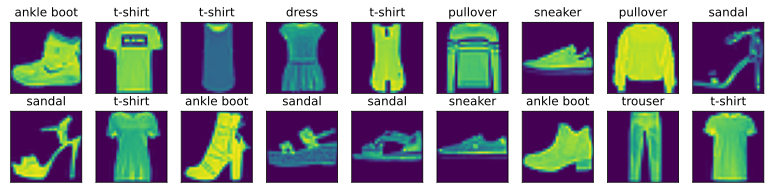

In [ ]:
def get_fashion_mnist_labels(labels):
  text_labels = [
                 't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal',
                 'shirt', 'sneaker', 'bag', 'ankle boot'
  ]

  return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
  axes = axes.flatten()

  for i, (ax, img) in enumerate(zip(axes, imgs)):
    ax.imshow(img.numpy())
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    if titles:
        ax.set_title(titles[i])
  return axes


# First 18 training images
X = tf.constant(mnist_train[0][:18])

# First 18 training labels
y = tf.constant(mnist_train[1][:18])

show_images(X, 2, 9, titles=get_fashion_mnist_labels(y))

In [ ]:
batch_size = 256

train_iter = tf.data.Dataset.from_tensor_slices(mnist_train
                                                ).batch(batch_size
                                                        ).shuffle(len(mnist_train))
                             
timer = d2l.Timer()

for X, y in train_iter:
  continue

f'{timer.stop():.2f} sec'

'0.24 sec'

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):
  # Download Fashion-MNIST
  mnist_train, mnist_test = tf.keras.datasets.fashion_mnist.load_data()

  # Normalize data
  process = lambda X, y: (tf.expand_dims(X,axis=3) / 255, tf.cast(y, dtype='int32'))
  resize_fn = lambda X, y: (tf.image.resize_with_pad(X, resize, resize) if resize else X, y)

  return (tf.data.Dataset.from_tensor_slices(
      process(*mnist_train)).batch(batch_size).shuffle(len(mnist_train[0])).map(resize_fn),
      tf.data.Dataset.from_tensor_slices(process(*mnist_test)).batch(batch_size).map(resize_fn))

In [ ]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
  print(X.shape, X.dtype, y.shape, y.dtype)
  break

(32, 64, 64, 1) <dtype: 'float32'> (32,) <dtype: 'int32'>


In [ ]:
# Implementation of Softmax Regression from Scratch

!pip install d2l
%matplotlib inline

import tensorflow as tf
from IPython import display
from d2l import tensorflow as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## Initialize weights with Gaussian noise

num_inputs = 784
num_outputs = 10

W = tf.Variable(
    tf.random.normal(shape=(num_inputs, num_outputs), mean=0, stddev=.01)
)

b = tf.Variable(tf.zeros(num_outputs))


X = tf.constant([[1., 2., 3.], [4., 5., 6.]])
tf.reduce_sum(X, 1, keepdims=True)

### Defining output
def softmax(X):
  X_exp = tf.exp(X)
  # Reduce sum along row
  # Each training example is 1 row
  partition = tf.reduce_sum(X_exp, 1, keepdims=True)
  # Broadcasting
  return X_exp / partition

# Test
X_prob = tf.random.normal((2,5), 0, 1)
X_prob = softmax(X_prob)


### Defining Model
def net(X):
  return softmax(tf.matmul(tf.reshape(X, (-1, W.shape[0])), W) + b)

In [ ]:
# Example
y_hat = tf.constant([[.6, .2, .2], [.3, .2, .5]])
y = tf.constant([0,1])

### Define loss
def cross_entropy(y_hat, y):

  mask = tf.boolean_mask(y_hat, tf.one_hot(y, depth=y_hat.shape[-1]))
  # For learning
  # print(mask)
  return -tf.math.log(mask
  )

cross_entropy(y_hat, y)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.5108256, 1.609438 ], dtype=float32)>

In [ ]:
### Classification accuracy: fraction of all predictions that are correct

def accuracy(y_hat, y):
  # Get index of row element that has highest probability
  y_hat = tf.argmax(y_hat, axis=1)

  cmp = tf.cast(y_hat, y.dtype) == y

  # Number of correctly classified examples
  return float(tf.reduce_sum(tf.cast(cmp, y.dtype)))

print(accuracy(y_hat, y) / len(y))

0.5


In [ ]:
def evaluate_accuracy(net, data_iter):
  metric = Accumulator(2)
  for X, y in data_iter:
    metric.add(accuracy(net(X), y), tf.size(y).numpy())
  return metric[0] / metric[1]


class Accumulator:
  '''
    Accumulate sums over 'n' variables
  '''
  def __init__(self, n):
    self.data = [.0] * n

  def add(self, *args):
    self.data = [a + float(b) for a, b in zip(self.data, args)]

  def reset(self):
    self.data = [.0] * len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]


# Because net model was initialized with random weights, accuracy should be close to random
# guessing (.1) probability

evaluate_accuracy(net, test_iter)

0.113

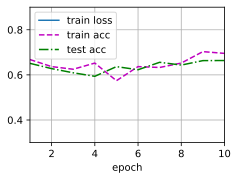

In [ ]:
class Animator:
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


### Training for epoch 
def train_epoch(net, train_iter, loss, updater):
  metric = Accumulator(3)

  # Iterate over batch
  for X, y in train_iter:
    with tf.GradientTape() as tape:
      # Make prediction
      y_hat = net(X)

      # Compute loss
      l = loss(y_hat, y)

      # Update weights
      updater(X.shape[0], tape.gradient(l, updater.params))

      l_sum = tf.reduce_sum(l)
      metric.add(l_sum, accuracy(y_hat, y), tf.size(y))
      return metric[0] / metric[2], metric[1] / metric[2]


def train(net, train_iter, test_iter, loss, num_epochs, updater):
  animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
   
  for epoch in range(num_epochs):
    train_metrics = train_epoch(net, train_iter, loss, updater)
    test_acc = evaluate_accuracy(net, test_iter)
    animator.add(epoch + 1, train_metrics + (test_acc,))

class Updater():
    """For updating parameters using minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.params = params
        self.lr = lr

    def __call__(self, batch_size, grads):
        d2l.sgd(self.params, grads, self.lr, batch_size)

updater = Updater([W, b], lr=0.1)

num_epochs = 10
train(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

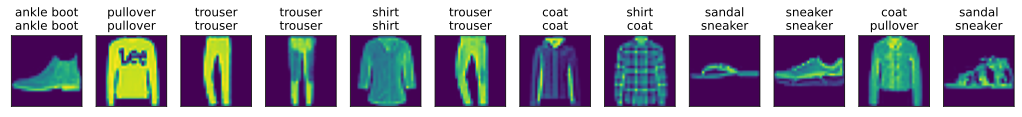

In [ ]:
def predict(net, test_iter, n=12):
  for X, y in test_iter:
        break
  trues = d2l.get_fashion_mnist_labels(y)
  preds = d2l.get_fashion_mnist_labels(tf.argmax(net(X), axis=1))
  titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
  d2l.show_images(tf.reshape(X[0:n], (n, 28,28)), 1, n, titles=titles[0:n])


predict(net, test_iter)

In [ ]:
## Concise implementation of Softmax

!pip install d2l

import tensorflow as tf
from d2l import tensorflow as d2l

batch_size = 256



     |████████████████████████████████| 83 kB 1.1 MB/s 


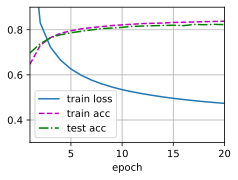

In [ ]:
net = tf.keras.models.Sequential()


train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# Input layer
net.add(tf.keras.layers.Flatten(input_shape=(28,28)))
net.add(tf.keras.layers.Dense(28*28))

# Output layer initialized with random values
weight_initializer = tf.keras.initializers.RandomNormal(mean=.0, stddev=.01)
net.add(tf.keras.layers.Dense(10, kernel_initializer=weight_initializer))

# Loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Optimization Algorithm
trainer = tf.keras.optimizers.SGD(learning_rate=.01)

num_epochs = 20
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
# Test prediction
import matplotlib.pyplot as plt

'''
def predict(net, test_iter, n=12):
  for X, y in test_iter:
        break
  trues = d2l.get_fashion_mnist_labels(y)
  preds = d2l.get_fashion_mnist_labels(tf.argmax(net(X), axis=1))
  titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
  d2l.show_images(tf.reshape(X[0:n], (n, 28,28)), 1, n, titles=titles[0:n])


text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

for X, y in test_iter:
  break

y_pred = tf.argmax(net.predict(X)[19]).numpy()
y = y.numpy()

fig, ax = plt.subplots()
ax.imshow(tf.reshape(X[19], (28,28)))
# ax.set_ylabel()
ax.set_title(text_labels[y_pred] + '\n' + text_labels[y[19]])
'''

d2l.predict_ch3(net, test_iter, 100)

In [2]:
# 4 Multilayer Perceptron

## 4.1 Hidden layers

### See notes

### Activation Functions

%matplotlib inline
%pip install d2l
import tensorflow as tf
from d2l import tensorflow as d2l


# Good performance on variety of predictive tasks: rectified linear unit (ReLU)

     |████████████████████████████████| 83 kB 1.8 MB/s 


**ReLU activation function:**

$$
  \text{ReLU}(x) = \max(x,0)
$$

In [ ]:
# Use Latex in labels
!apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng
!apt install dvipng texlive-latex-extra texlive-fonts-recommended cm-super
!pip install latex
import matplotlib
matplotlib.rcParams['text.usetex'] = True

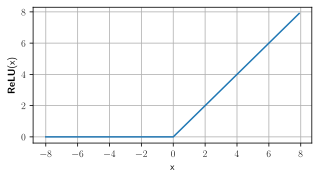

In [15]:
x = tf.Variable(tf.range(-8., 8., .1), dtype=tf.float32)
y = tf.nn.relu(x)
d2l.plot(x.numpy(), y.numpy(), 'x', r'\textbf{ReLU}(x)', figsize=(5,2.5))

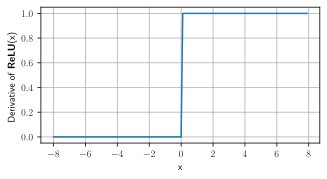

In [20]:
with tf.GradientTape() as t:
  y = tf.nn.relu(x)

d2l.plot(x.numpy(), t.gradient(y, x).numpy(), 'x', r'Derivative of \textbf{ReLU}(x)', figsize=(5,2.5))

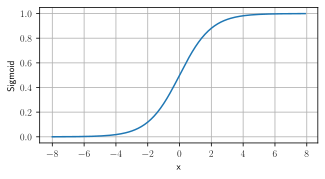

In [24]:
## Sigmoid
import matplotlib.pyplot as plt


y = tf.nn.sigmoid(x)
d2l.plot(x.numpy(), y.numpy(), 'x', 'Sigmoid', figsize=(5,2.5))
plt.savefig('out.png', dpi=300)

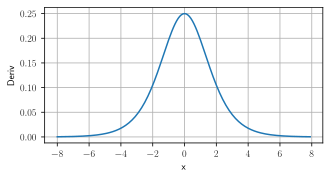

In [26]:
with tf.GradientTape() as t:
  y = tf.nn.sigmoid(x)

d2l.plot(x.numpy(), t.gradient(y, x).numpy(), 'x', 'Deriv', figsize=(5,2.5))

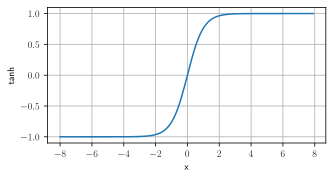

In [27]:
# Tanh activation function
y = tf.nn.tanh(x)
d2l.plot(x.numpy(), y.numpy(), 'x', 'tanh', figsize=(5,2.5))

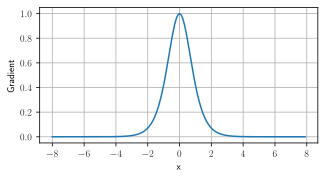

In [28]:
with tf.GradientTape() as t:
  y = tf.nn.tanh(x)

d2l.plot(x.numpy(), t.gradient(y,x).numpy(), 'x', 'Gradient', figsize=(5,2.5))

In [ ]:
## 4.2 Implementation of MLP from Scratch